In [33]:
import seaborn as sns
import pandas as pd

In [34]:
# import pandas as pd
# import shutil
# import glob
# files = glob.glob("results/*")
# for file in files:
#     file_name = file.split("/")[1]
#     file_name = file_name.replace(":","-")
#     shutil.copy(file, f"window_results/{file_name}")

In [35]:
names_df = pd.read_csv("names.csv")

In [36]:
# race -> name -> percent female at birth
names_map = {}
for index, row in names_df.iterrows():
    race = row.iloc[1]
    name = row.iloc[2]
    percent = row.iloc[3]
    if race not in names_map:
        names_map[race] = {}
    names_map[race][name] = percent

In [37]:
names_map

{'Asian': {'Seung': 0.0,
  'Quoc': 0.0,
  'Dat': 0.0,
  'Nghia': 2.3,
  'Thuan': 2.4,
  'Thien': 2.7,
  'Hoang': 6.4,
  'Sang': 6.6,
  'Jun': 9.6,
  'Sung': 13.5,
  'Jie': 17.3,
  'Wei': 21.8,
  'Hyun': 39.0,
  'Khanh': 41.9,
  'Wen': 44.6,
  'Hien': 51.7,
  'An': 54.8,
  'Ji': 61.4,
  'In': 80.8,
  'Diem': 88.6,
  'Quyen': 88.9,
  'Ling': 91.3,
  'Xiao': 91.5,
  'Ngoc': 92.4,
  'Su': 95.4,
  'Hanh': 95.6,
  'Vy': 97.0,
  'Eun': 98.3,
  'Trinh': 100.0,
  'Huong': 100.0},
 'Black': {'Deontae': 0.0,
  'Antwon': 0.1,
  'Javonte': 1.0,
  'Dejon': 2.9,
  'Jamell': 3.4,
  'Dijon': 4.6,
  'Dashawn': 5.8,
  'Deshon': 6.2,
  'Pernell': 8.3,
  'Rashawn': 10.1,
  'Torrance': 13.2,
  'Semaj': 22.6,
  'Demetris': 25.6,
  'Kamari': 33.6,
  'Amari': 42.0,
  'Shamari': 56.1,
  'Kenyatta': 57.1,
  'Ivory': 59.3,
  'Chaka': 76.2,
  'Ashante': 89.4,
  'Unique': 89.9,
  'Kenya': 92.2,
  'Nikia': 93.8,
  'Akia': 94.3,
  'Kenyetta': 95.5,
  'Shante': 96.4,
  'Shaunta': 97.0,
  'Laquandra': 100.0,
  'Lakesia

In [38]:
results_df = pd.read_csv("accuracy_results.csv")

In [39]:
print(results_df)

          name1 name2      race  tp  fp  tn  fn  total
0          Xiao  Diem     Asian  14   5  19  62    100
1          Xiao  Diem     Asian  14   5  19  62    100
2          Xiao  Diem     Asian  14   5  19  62    100
3          Xiao  Diem     Asian  14   5  19  62    100
4          Xiao  Diem     Asian  14   5  19  62    100
...         ...   ...       ...  ..  ..  ..  ..    ...
186490  Johanny  Raul  Hispanic   0   3   7  15     25
186491  Johanny  Raul  Hispanic   0   3   7  15     25
186492  Johanny  Raul  Hispanic   0   3   7  15     25
186493  Johanny  Raul  Hispanic   0   3   7  15     25
186494  Johanny  Raul  Hispanic   0   3   7  15     25

[186495 rows x 8 columns]


In [40]:
results_df["percent 1"] = results_df.apply(lambda x: names_map[x["race"]][x["name1"]], axis=1)
results_df["percent 2"] = results_df.apply(lambda x: names_map[x["race"]][x["name2"]], axis=1)

In [41]:
results_df

,name1,name2,race,tp,fp,tn,fn,total,percent 1,percent 2
0,Xiao,Diem,Asian,14,5,19,62,100,91.5,88.6
1,Xiao,Diem,Asian,14,5,19,62,100,91.5,88.6
2,Xiao,Diem,Asian,14,5,19,62,100,91.5,88.6
3,Xiao,Diem,Asian,14,5,19,62,100,91.5,88.6
4,Xiao,Diem,Asian,14,5,19,62,100,91.5,88.6
...,...,...,...,...,...,...,...,...,...,...
186490,Johanny,Raul,Hispanic,0,3,7,15,25,89.4,0.6
186491,Johanny,Raul,Hispanic,0,3,7,15,25,89.4,0.6
186492,Johanny,Raul,Hispanic,0,3,7,15,25,89.4,0.6
186493,Johanny,Raul,Hispanic,0,3,7,15,25,89.4,0.6


In [42]:
results_df["bucket 1"] = pd.cut(x=results_df['percent 1'], bins=[-1, 2, 5, 10, 25, 50, 75, 90, 95, 98, 100], labels=["0-2", "2-5", "5-10", "10-25", "25-50", "50-75", "75-90", "90-95", "95-98", "98-100"])
results_df["bucket 2"] = pd.cut(x=results_df['percent 2'], bins=[-1, 2, 5, 10, 25, 50, 75, 90, 95, 98, 100], labels=["0-2", "2-5", "5-10", "10-25", "25-50", "50-75", "75-90", "90-95", "95-98", "98-100"])

In [53]:
# grouped_df = results_df.groupby(by=["bucket 1", "bucket 2"], as_index=False)["accuracy"].mean()
grouped_df = results_df.groupby(by=["race", "bucket 1", "bucket 2"], as_index=False)[["tp","tn","fp","fn","total"]].sum()

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_4468/920615068.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = results_df.groupby(by=["race", "bucket 1", "bucket 2"], as_index=False)[["tp","tn","fp","fn","total"]].sum()


In [75]:
grouped_df.sort_values(["bucket 1","bucket 2"], ascending=True)

,race,bucket 1,bucket 2,tp,tn,fp,fn,total,precision,accuracy,recall,f1
0,Asian,0-2,0-2,5890,12580,1796,39535,59801,0.77,0.31,0.13,0.22
100,Black,0-2,0-2,3900,13300,1100,41700,60000,0.78,0.29,0.09,0.16
200,Hispanic,0-2,0-2,0,1225,275,2250,3750,0.00,0.33,0.00,NaN
1,Asian,0-2,2-5,8490,18181,3395,59735,89801,0.71,0.30,0.12,0.21
101,Black,0-2,2-5,5700,19400,2200,62700,90000,0.72,0.28,0.08,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...
198,Black,98-100,95-98,9900,16800,4800,58500,90000,0.67,0.30,0.14,0.23
298,Hispanic,98-100,95-98,25,1600,650,3350,5625,0.04,0.29,0.01,0.02
99,Asian,98-100,98-100,9500,10300,4100,36100,60000,0.70,0.33,0.21,0.32
199,Black,98-100,98-100,6000,11600,2800,39600,60000,0.68,0.29,0.13,0.22


In [54]:
grouped_df["precision"] = (grouped_df["tp"] / (grouped_df["tp"] + grouped_df["fp"])).round(2)
grouped_df["accuracy"] = ((grouped_df["tp"] + grouped_df["tn"]) / grouped_df["total"]).round(2)
grouped_df["recall"] = (grouped_df["tp"] / (grouped_df["tp"] + grouped_df["fn"])).round(2)
grouped_df["f1"] = (2 * (grouped_df["precision"] * grouped_df["recall"]) / (grouped_df["precision"] + grouped_df["recall"])).round(2)

In [55]:
def generate_heatmap(df, value, race):
    heatmap_df = pd.pivot_table(grouped_df[grouped_df["race"] == race], values=value, index='bucket 1',
                       columns='bucket 2')
    cmap = sns.light_palette("seagreen", as_cmap=True)
    ax = sns.heatmap(data=heatmap_df, cmap="Greens", annot=True)
    ax.set_xlabel("% Female")
    ax.set_ylabel("% Female")
    ax.set_title(f"{race} {value}")

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_4468/1910249381.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df[grouped_df["race"] == race], values=value, index='bucket 1',


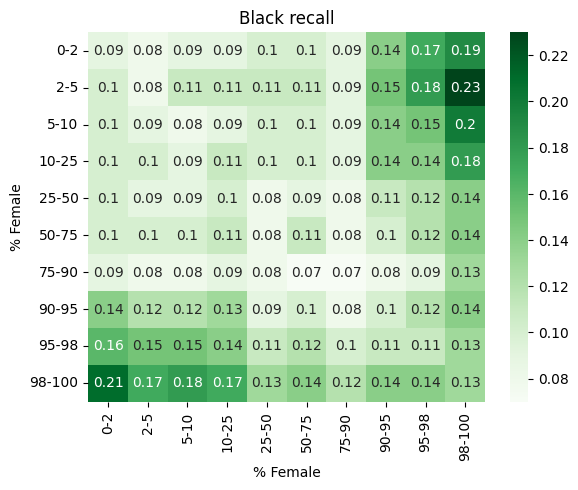

In [80]:
generate_heatmap(grouped_df, "recall", "Black")

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_4468/1910249381.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df[grouped_df["race"] == race], values=value, index='bucket 1',


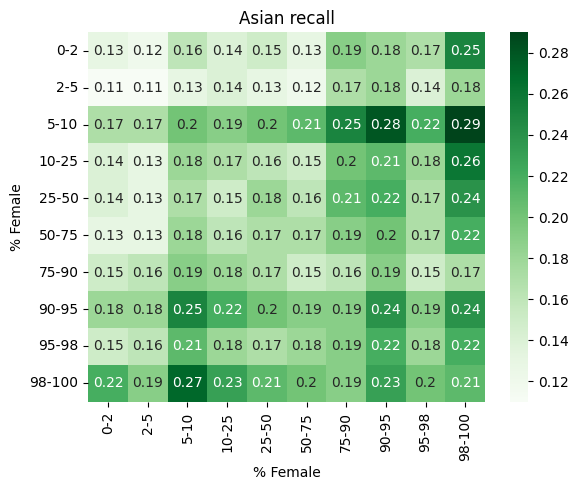

In [81]:
generate_heatmap(grouped_df, "recall", "Asian")

In [59]:
generate_heatmap(grouped_df, "accuracy")

TypeError: generate_heatmap() missing 1 required positional argument: 'race'

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_4468/2732139472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',


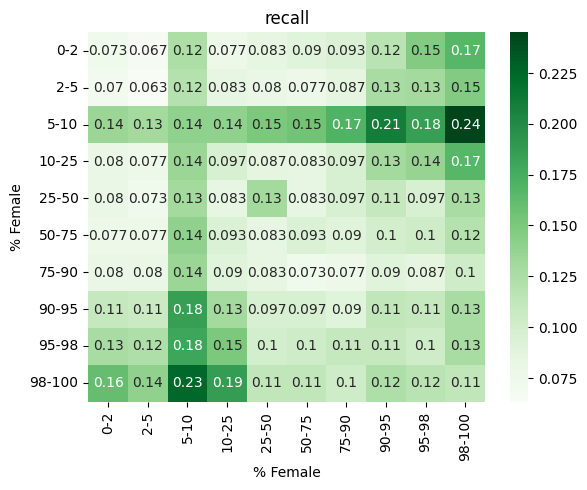

In [50]:
generate_heatmap(grouped_df, "recall")

/var/folders/nb/gtmry_bd5tqgglql1jk2pyzh0000gn/T/ipykernel_4468/2732139472.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_df = pd.pivot_table(grouped_df, values=value, index='bucket 1',


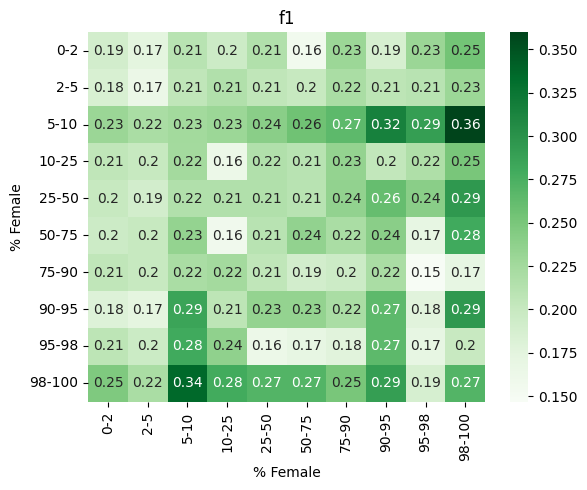

In [51]:
generate_heatmap(grouped_df, "f1")